# Clustering for UMAP-2D

# 1. Import Data

In [1]:
import pandas as pd
df = pd.read_csv("6. Clustering.csv")
print("The shape of df is", df.shape)
df.head()

The shape of df is (500, 4)


,pdf_filename,X1,X2,normal
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,9.966893,9.228810,0
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,9.752504,9.033387,0
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,9.121086,10.243672,1
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,9.303379,10.575117,1
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,7.134477,9.970622,0


# Scatter plot

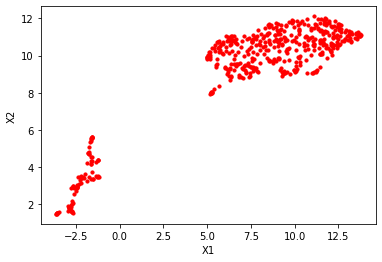

In [2]:
df.plot.scatter(x = 'X1', y = 'X2', s = 10, c = 'red');   ## s = 'Age'

In [3]:
df["pred"] = df["X1"] < 2.5
df.head()

,pdf_filename,X1,X2,normal,pred
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,9.966893,9.228810,0,False
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,9.752504,9.033387,0,False
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,9.121086,10.243672,1,False
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,9.303379,10.575117,1,False
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,7.134477,9.970622,0,False


In [4]:
df["pred"].value_counts()

False    413
True      87
Name: pred, dtype: int64

# 2. Import other labels

In [5]:
label = pd.read_csv("gradings_agreement_raw.csv")
print("The shape of label is", label.shape)
label.head()

The shape of label is (500, 15)


,pdf_filename,reliability,normal,gdefect1,gposition1,gdefect2,gposition2,gdefect3,gposition3,ngdefect1,ngposition1,ngdefect2,ngposition2,artifact1,artifact2
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,1,0,3,1,0,0,0,0,0,0,0,0,0,0
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,1,0,3,1,0,0,0,0,0,0,0,0,0,0
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,1,0,3,1,0,0,0,0,0,0,0,0,0,0


### Make sure the orders are right!

In [6]:
label["pdf_filename"].compare(df["pdf_filename"])

,self,other


In [7]:
label["normal"].compare(df["normal"])

,self,other


# 3. Compare with other label

In [8]:
label["pred"] = df["pred"]
print("The shape of label is", label.shape)
label.head()

The shape of label is (500, 16)


,pdf_filename,reliability,normal,gdefect1,gposition1,gdefect2,gposition2,gdefect3,gposition3,ngdefect1,ngposition1,ngdefect2,ngposition2,artifact1,artifact2,pred
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,1,0,3,1,0,0,0,0,0,0,0,0,0,0,False
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,1,0,3,1,0,0,0,0,0,0,0,0,0,0,False
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,False
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,False
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,1,0,3,1,0,0,0,0,0,0,0,0,0,0,False


In [11]:
l = ["reliability", "normal", "gdefect1", "gdefect2", "gdefect3", 
     "ngdefect1", "ngdefect2", "artifact1", "artifact2", "pred"]
label = label[l]
label.head()

,reliability,normal,gdefect1,gdefect2,gdefect3,ngdefect1,ngdefect2,artifact1,artifact2,pred
0,1,0,3,0,0,0,0,0,0,False
1,1,0,3,0,0,0,0,0,0,False
2,1,1,0,0,0,0,0,0,0,False
3,1,1,0,0,0,0,0,0,0,False
4,1,0,3,0,0,0,0,0,0,False


In [12]:
label["pred"].value_counts()

False    413
True      87
Name: pred, dtype: int64

In [16]:
label["pred1"] = label["pred"]
label["pred2"] = label["pred"]
label.head()

,reliability,normal,gdefect1,gdefect2,gdefect3,ngdefect1,ngdefect2,artifact1,artifact2,pred,pred1,pred2
0,1,0,3,0,0,0,0,0,0,False,False,False
1,1,0,3,0,0,0,0,0,0,False,False,False
2,1,1,0,0,0,0,0,0,0,False,False,False
3,1,1,0,0,0,0,0,0,0,False,False,False
4,1,0,3,0,0,0,0,0,0,False,False,False


In [17]:
len(label["pred"])

500

In [19]:
for i in range(len(label["pred"])):
    if label["pred"][i] == False:
        label["pred1"][i] = 1
    else: 
        label["pred2"][i] = 0
        
for i in range(len(label["pred"])):
    if label["pred"][i] == True:
        label["pred1"][i] = 1
    else: 
        label["pred2"][i] = 0
        
label.head()

,reliability,normal,gdefect1,gdefect2,gdefect3,ngdefect1,ngdefect2,artifact1,artifact2,pred,pred1,pred2
0,1,0,3,0,0,0,0,0,0,False,1,0
1,1,0,3,0,0,0,0,0,0,False,1,0
2,1,1,0,0,0,0,0,0,0,False,1,0
3,1,1,0,0,0,0,0,0,0,False,1,0
4,1,0,3,0,0,0,0,0,0,False,1,0


In [21]:
label["pred1"].compare(label["pred2"]).shape

(500, 2)

In [22]:
for i in range(len(label["gdefect1"])):
    if label["gdefect1"][i] == 0:
        label["gdefect1"][i] = 0
    else: 
        label["gdefect1"][i] = 1
        
label.head()

/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,reliability,normal,gdefect1,gdefect2,gdefect3,ngdefect1,ngdefect2,artifact1,artifact2,pred,pred1,pred2
0,1,0,1,0,0,0,0,0,0,False,1,0
1,1,0,1,0,0,0,0,0,0,False,1,0
2,1,1,0,0,0,0,0,0,0,False,1,0
3,1,1,0,0,0,0,0,0,0,False,1,0
4,1,0,1,0,0,0,0,0,0,False,1,0


In [25]:
for i in range(len(label["gdefect2"])):
    if label["gdefect2"][i] == 0:
        label["gdefect2"][i] = 0
    else: 
        label["gdefect2"][i] = 1
        
label.head(10)

/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,reliability,normal,gdefect1,gdefect2,gdefect3,ngdefect1,ngdefect2,artifact1,artifact2,pred,pred1,pred2
0,1,0,1,0,0,0,0,0,0,False,1,0
1,1,0,1,0,0,0,0,0,0,False,1,0
2,1,1,0,0,0,0,0,0,0,False,1,0
3,1,1,0,0,0,0,0,0,0,False,1,0
4,1,0,1,0,0,0,0,0,0,False,1,0
5,1,0,1,0,0,0,0,0,0,False,1,0
6,1,0,1,1,0,0,0,0,0,True,1,0
7,1,0,1,0,0,0,0,0,0,False,1,0
8,1,0,1,0,0,0,0,0,0,False,1,0
9,1,1,0,0,0,0,0,0,0,False,1,0


In [36]:
for i in range(len(label["gdefect3"])):
    if label["gdefect3"][i] == 0:
        label["gdefect3"][i] = 0
    else: 
        label["gdefect3"][i] = 1
        
label.head()

/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,reliability,normal,gdefect1,gdefect2,gdefect3,ngdefect1,ngdefect2,artifact1,artifact2,pred,pred1,pred2
0,1,0,1,0,0,0,0,0,0,False,1,0
1,1,0,1,0,0,0,0,0,0,False,1,0
2,1,1,0,0,0,0,0,0,0,False,1,0
3,1,1,0,0,0,0,0,0,0,False,1,0
4,1,0,1,0,0,0,0,0,0,False,1,0


In [43]:
for i in range(len(label["ngdefect1"])):
    if label["ngdefect1"][i] == 0:
        label["ngdefect1"][i] = 0
    else: 
        label["ngdefect1"][i] = 1
        
label.head()

/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,reliability,normal,gdefect1,gdefect2,gdefect3,ngdefect1,ngdefect2,artifact1,artifact2,pred,pred1,pred2
0,1,0,1,0,0,0,0,0,0,False,1,0
1,1,0,1,0,0,0,0,0,0,False,1,0
2,1,1,0,0,0,0,0,0,0,False,1,0
3,1,1,0,0,0,0,0,0,0,False,1,0
4,1,0,1,0,0,0,0,0,0,False,1,0


In [54]:
for i in range(len(label["artifact1"])):
    if label["artifact1"][i] == 0:
        label["artifact1"][i] = 0
    else: 
        label["artifact1"][i] = 1
        
label.head()

/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,reliability,normal,gdefect1,gdefect2,gdefect3,ngdefect1,ngdefect2,artifact1,artifact2,pred,pred1,pred2
0,1,0,1,0,0,0,0,0,0,False,1,0
1,1,0,1,0,0,0,0,0,0,False,1,0
2,1,1,0,0,0,0,0,0,0,False,1,0
3,1,1,0,0,0,0,0,0,0,False,1,0
4,1,0,1,0,0,0,0,0,0,False,1,0


1. normal
2. reliability
3. gdefect1
4. gdefect2
5. gdefect3
6. ngdefect1
7. ngdefect2
8. artifact1
9. artifact2

### 1. normal

In [60]:
# 1.
print(label["normal"].compare(label["pred1"]).shape)
print(label["normal"].compare(label["pred2"]).shape)

(315, 2)
(185, 2)


### 2. reliability

In [61]:
# 2. 
print(label["reliability"].compare(label["pred1"]).shape)
print(label["reliability"].compare(label["pred2"]).shape)

(147, 2)
(353, 2)


### 3. gdefect1

In [62]:
# 3. 
print(label["gdefect1"].compare(label["pred1"]).shape)
print(label["gdefect1"].compare(label["pred2"]).shape)

(203, 2)
(297, 2)


### 4. gdefect2

In [64]:
# 4. 
print(label["gdefect2"].compare(label["pred1"]).shape)
print(label["gdefect2"].compare(label["pred2"]).shape)

(421, 2)
(79, 2)


# 5. gdefect3

In [67]:
# 5. 
print(label["gdefect3"].compare(label["pred1"]).shape)
print(label["gdefect3"].compare(label["pred2"]).shape)

(486, 2)
(14, 2)


# 6. ngdefect1

In [68]:
# 6. 
print(label["ngdefect1"].compare(label["pred1"]).shape)
print(label["ngdefect1"].compare(label["pred2"]).shape)

(478, 2)
(22, 2)


### 7. ngdefect2

In [69]:
# 7. 
print(label["ngdefect2"].compare(label["pred1"]).shape)
print(label["ngdefect2"].compare(label["pred2"]).shape)
##### No information~~~~

(500, 2)
(0, 2)


# 8. artifact1

In [72]:
# 8. 
print(label["artifact1"].compare(label["pred1"]).shape)
print(label["artifact1"].compare(label["pred2"]).shape)

(492, 2)
(8, 2)


### 9. artifact2

In [73]:
# 9. 
print(label["artifact2"].compare(label["pred1"]).shape)
print(label["artifact2"].compare(label["pred2"]).shape)

##### No information~~~~

(500, 2)
(0, 2)


# ngdefect1 vs. artifact1 are almost the same

In [74]:
print("The shape of difference is", label["ngdefect1"].compare(label["artifact1"]).shape)
label["ngdefect1"].compare(label["artifact1"])

The shape of difference is (28, 2)


,self,other
55,0.0,1.0
72,0.0,1.0
86,1.0,0.0
94,1.0,0.0
135,1.0,0.0
189,1.0,0.0
195,1.0,0.0
200,0.0,1.0
201,0.0,1.0
210,1.0,0.0


In [75]:
print("The shape of difference is", label["gdefect3"].compare(label["artifact1"]).shape)
label["gdefect3"].compare(label["artifact1"])

The shape of difference is (22, 2)


,self,other
55,0.0,1.0
72,0.0,1.0
171,1.0,0.0
188,1.0,0.0
199,1.0,0.0
200,0.0,1.0
201,0.0,1.0
275,1.0,0.0
280,0.0,1.0
298,1.0,0.0


In [76]:
print("The shape of difference is", label["gdefect3"].compare(label["ngdefect1"]).shape)
label["gdefect3"].compare(label["ngdefect1"])

The shape of difference is (34, 2)


,self,other
86,0.0,1.0
94,0.0,1.0
135,0.0,1.0
171,1.0,0.0
188,1.0,0.0
189,0.0,1.0
195,0.0,1.0
199,1.0,0.0
210,0.0,1.0
275,1.0,0.0
